### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# To Define path 
path = r'/Users/oluwaseunodusanya/Desktop/23.07.2023_Germany Apartment Rental Offer Analysis'

In [4]:
df_rental = pd.read_csv(os.path.join(path, '02 Data','02 Prepared Data','updated_clean_apartment_rental_data.csv'), index_col = False)

In [6]:
# To print the number of rows and columns in the data set
df_rental.shape

(267080, 32)

In [7]:
# To print the first 5 columns of the data set
df_rental.head()

,Unnamed: 0,state,service charge,heating type,telekom tv offer,newly constructed,balcony,picture count,telekom upload speed,total rent,...,number of rooms,energy need,floor,garden,city/town,lastRefurbish,electricityBasePrice,date,base rent offer,rental offer
0,0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,False,False,6.0,10.0,840.0,...,4.0,181.4,1.0,True,Schüren,2017.0,90.76,May19,Middle base rent,Middle rental offer
1,1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,False,True,8.0,10.0,650.0,...,3.0,107.0,2.0,False,Böhl_Iggelheim,2019.0,90.76,May19,High base rent,Middle rental offer
2,2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,True,True,8.0,2.4,1300.0,...,3.0,107.0,3.0,False,Äußere_Neustadt_Antonstadt,2017.0,90.76,Oct19,High base rent,High rental offer
3,3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,False,True,9.0,40.0,650.0,...,3.0,86.0,3.0,False,Freiberg,2017.0,90.76,May19,Middle base rent,Middle rental offer
4,4,Bremen,138.00,self_contained_central_heating,ONE_YEAR_FREE,False,True,19.0,40.0,903.0,...,3.0,188.9,1.0,False,Neu_Schwachhausen,2017.0,90.76,Feb20,High base rent,High rental offer


In [10]:
df_rental.columns

Index(['Unnamed: 0', 'state', 'service charge', 'heating type',
       'telekom tv offer', 'newly constructed', 'balcony', 'picture count',
       'telekom upload speed', 'total rent', 'year constructed',
       'parking spaces', 'energy source', 'kitchen', 'cellar', 'base rent',
       'living space', 'condition of flat', 'interior qual', 'pets allowed',
       'lift', 'type of flat', 'number of rooms', 'energy need', 'floor',
       'garden', 'city/town', 'lastRefurbish', 'electricityBasePrice', 'date',
       'base rent offer', 'rental offer'],
      dtype='object')

In [15]:
# To drop categorical variables
df_Kmeans = df_rental.drop(columns = ['Unnamed: 0','state','heating type','telekom tv offer','newly constructed','balcony','year constructed','parking spaces','energy source','kitchen','cellar','condition of flat','interior qual','pets allowed','lift','type of flat','garden', 'city/town','lastRefurbish','electricityBasePrice','date', 'base rent offer','rental offer'])

In [16]:
df_Kmeans

,service charge,picture count,telekom upload speed,total rent,base rent,living space,number of rooms,energy need,floor
0,245.00,6.0,10.0,840.0,595.0,86.00,4.0,181.40,1.0
1,134.00,8.0,10.0,650.0,800.0,89.00,3.0,107.00,2.0
2,255.00,8.0,2.4,1300.0,965.0,83.80,3.0,107.00,3.0
3,58.15,9.0,40.0,650.0,343.0,58.15,3.0,86.00,3.0
4,138.00,19.0,40.0,903.0,765.0,84.97,3.0,188.90,1.0
...,...,...,...,...,...,...,...,...,...
267075,90.00,0.0,10.0,910.0,820.0,90.00,3.0,107.00,2.0
267076,220.00,12.0,40.0,1150.0,930.0,115.00,3.5,107.00,1.0
267077,220.00,21.0,40.0,930.0,650.0,95.00,4.0,160.77,1.0
267078,175.00,16.0,40.0,1015.0,840.0,70.00,2.0,24.70,2.0


### 2. The elbow technique

In [17]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [18]:
score = [kmeans[i].fit(df_Kmeans).score(df_Kmeans) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

/Users/oluwaseunodusanya/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/oluwaseunodusanya/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/oluwaseunodusanya/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/oluwaseunodusanya/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress t

[-50995555137.65463,
 -19141557535.971992,
 -10775767192.337967,
 -8168173910.688444,
 -6638549940.135246,
 -5307252544.104406,
 -4471360733.980091,
 -4075085550.378495,
 -3687127078.400643]

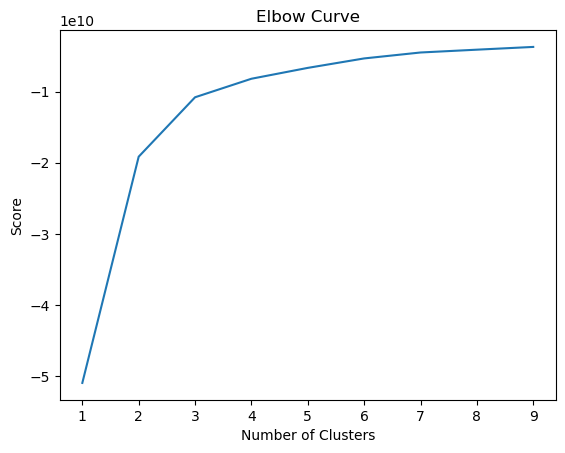

In [19]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [27]:
# Create the k-means object
kmeans = KMeans(n_clusters = 3)

#####  IThe plot indicates that there's a large jump from two to three on the x-axis, and additional slight jump from 3 to 4; but after that, the curve straightens out. This means that the optimal count for your clusters is 3. I tried 4 as the optimum number of cluster but 3 looked visualiy appealing than 4

In [28]:
# Fit the k-means object to the data.

kmeans.fit(df_Kmeans)

/Users/oluwaseunodusanya/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [29]:
df_Kmeans['clusters'] = kmeans.fit_predict(df_Kmeans)

/Users/oluwaseunodusanya/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [30]:
df_Kmeans.head()

,service charge,picture count,telekom upload speed,total rent,base rent,living space,number of rooms,energy need,floor,clusters
0,245.00,6.0,10.0,840.0,595.0,86.00,4.0,181.4,1.0,2
1,134.00,8.0,10.0,650.0,800.0,89.00,3.0,107.0,2.0,2
2,255.00,8.0,2.4,1300.0,965.0,83.80,3.0,107.0,3.0,1
3,58.15,9.0,40.0,650.0,343.0,58.15,3.0,86.0,3.0,0
4,138.00,19.0,40.0,903.0,765.0,84.97,3.0,188.9,1.0,2


In [31]:
df_Kmeans['clusters'].value_counts()

0    141885
2     90603
1     34592
Name: clusters, dtype: int64

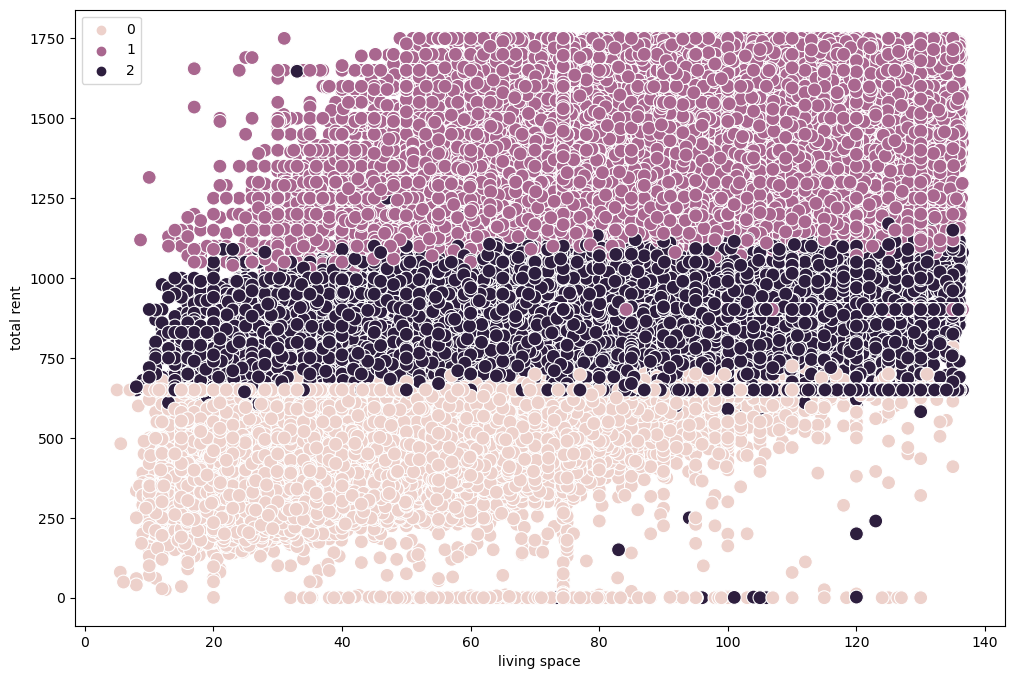

In [32]:
# Plot the clusters for the "living space" and "total rent" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_Kmeans['living space'], y=df_Kmeans['total rent'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('living space') # Label x-axis.
plt.ylabel('total rent') # Label y-axis.
plt.show()

#### The first and most populated cluster in medium purple, is the cluster coded as "1" in the legend. It clustered data points with highest total rent and also ranges across relatively small to largest living space. Second cluster in dark purple, coded as "2" gathered points with moderatly high total rent but also range across relatively small living spaces to lagest living spaces. The third cluster in medium purple coded as "0" in the legend includes points with the lowest total rent, and majority of the data points have small living space but also there are apartments that fall within this low range of total but have large living spaces.

#### Generally the three clusters are distinct only on total rent level(except for data points from the second cluster coded as "2" that were found in the high and low rental offers' category) but all categories range from smallest to largest living spaces

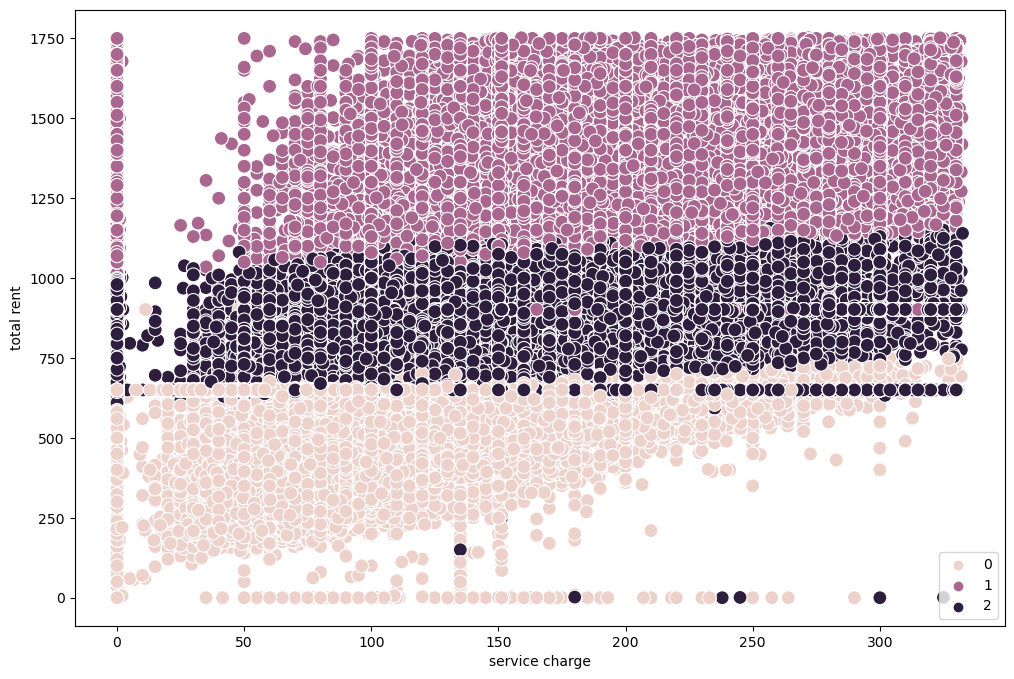

In [33]:
# Plot the clusters for the "service charge" and "total rent" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_Kmeans['service charge'], y=df_Kmeans['total rent'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('service charge') # Label x-axis.
plt.ylabel('total rent') # Label y-axis.
plt.show()

#### The first cluster in medium purple, coded as "1" represents data points with highest rental offer and service charge rate that ranges from low to  high service charge. The second cluster in dark purple gathered apartments that offer moderately high rent, with few points found in the low total rent levelbut are also seen to range from low to high service charges. The last cluster in pink represents apartments with low rental offer and majority of the points having low to moderatly high service charge. There were data points from this cluster with high service charge.

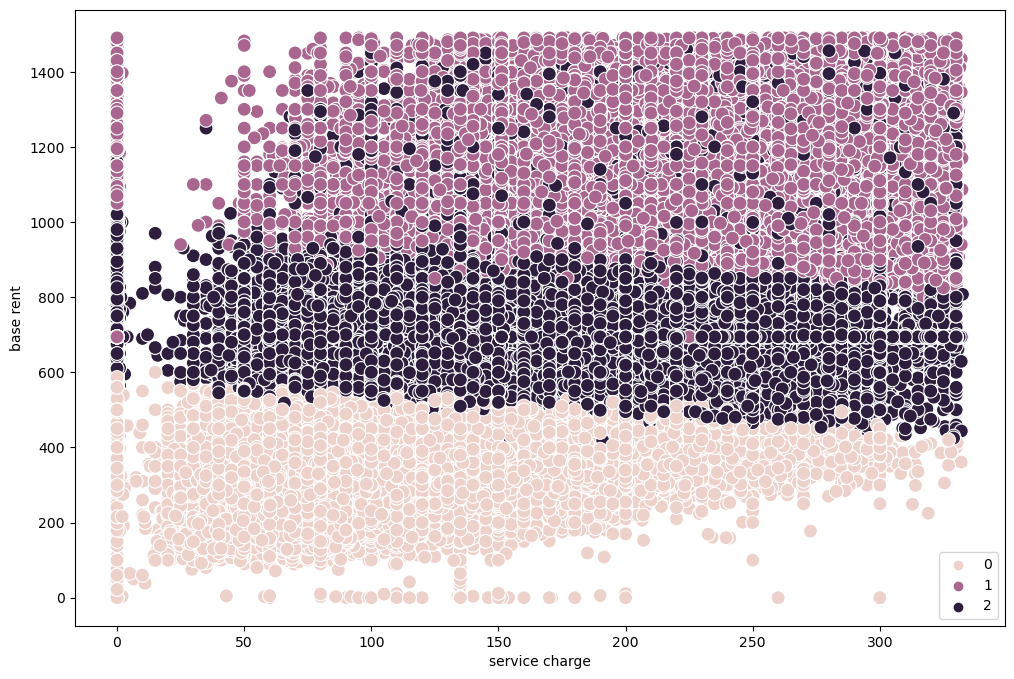

In [34]:
# Plot the clusters for the "service charge" and "total rent" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_Kmeans['service charge'], y=df_Kmeans['base rent'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('service charge') # Label x-axis.
plt.ylabel('base rent') # Label y-axis.
plt.show()

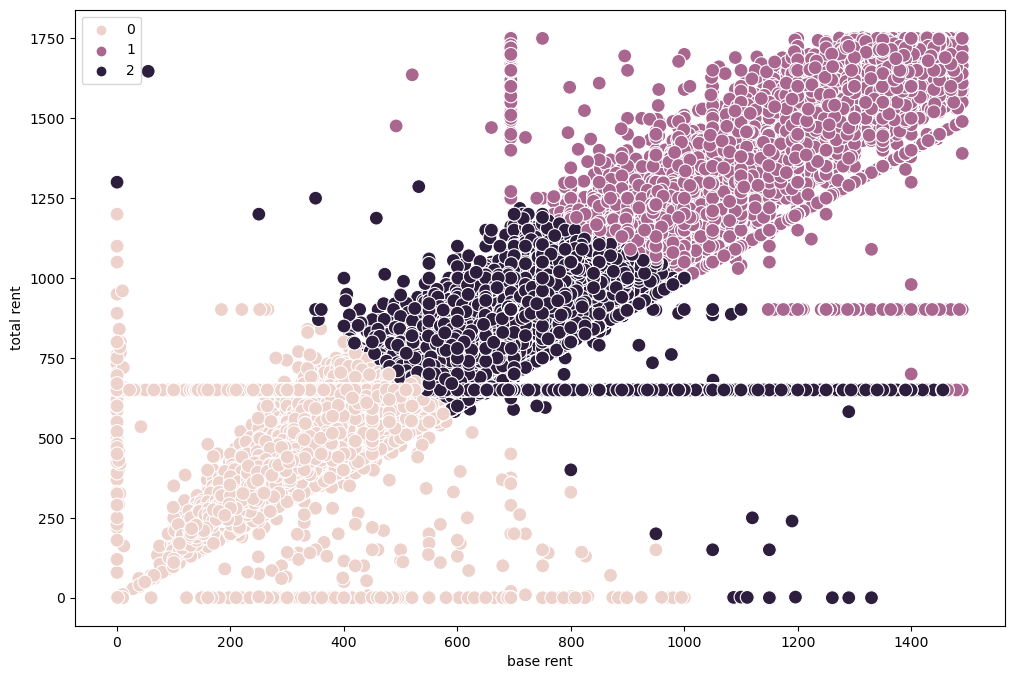

In [35]:
# Plot the clusters for the "service charge" and "total rent" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_Kmeans['base rent'], y=df_Kmeans['total rent'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('base rent') # Label x-axis.
plt.ylabel('total rent') # Label y-axis.
plt.show()

####  There are no apartments with low base rent less than 400 euros in the medium purple cluster of points (coded as "1" in the legend). There are also no apartments with high base rent above 1000 euros in the pink cluster of points (coded as "0" in the legend). Only the dark purple clusters gathered apartments with moderate rental offer but have base rents that ranges from low to high.

In [39]:
df_Kmeans.loc[df_Kmeans['clusters'] == 2, 'cluster'] = 'dark purple'
df_Kmeans.loc[df_Kmeans['clusters'] == 1, 'cluster'] = 'purple'
df_Kmeans.loc[df_Kmeans['clusters'] == 0, 'cluster'] = 'pink'

In [43]:
df_Kmeans.groupby('cluster').agg({'service charge':['mean', 'median'], 
                         'living space':['mean', 'median'],
                          'base rent':['mean', 'median'],
                        'total rent':['mean', 'median'],})

service charge        living space           base rent  \
                      mean median         mean median         mean   
cluster                                                              
dark purple     165.296167  153.0    80.981612  78.00   710.966998   
pink            111.186954  110.0    56.767338  57.83   347.932236   
purple          196.965512  200.0    91.800433  92.00  1113.163376   

                           total rent          
                  median         mean  median  
cluster                                        
dark purple   694.271567   818.508794   820.0  
pink          345.000000   503.112127   504.0  
purple       1100.000000  1340.429897  1320.0

#### The medium purple cluster has the best stats in all categories. The service charge for this type of apartment is 200, which is significantly larger than the other two clusters. It also has the highest total rental offer

#### Living space of apartments seem to matter in that medium purple clusters have higher median than the other two clusters but closer to the second best-rated cluster (dark purple)

#### The base rent have significantly high median for the medium purple clusters compared to the remaining two clusters. One can indicate that apartments with largest living space contributes to high base rent, and high base rent in addition to high service charge results in high total rental offers

The trend mentioned in the last point above is the same for the second best-rated clusters (in dark purple) and third clusters (in pink), but more prominent in the first clusters (in medium purple) in terms of which factor contributes more to apartments' rental offers in Germany

#### This insights can help make recommendations that will guide and inform Germany residents when they search and make Potential apartment choices